In [1]:
from helpers import *

In [2]:
SEED = 2
torch.manual_seed(SEED)
np.random.seed(SEED)

In [3]:
SC = load_SC_88("../data/")

nn = SC.shape[0]

params = {
    "G": 0.5,                         # global coupling strength

    "fix_seed": 0,
    "seed": SEED,
    "t_initial": 0.0,               # initial time * 10[ms]
    "t_transition": 10.0,         # transition time * 10 [ms]
    "t_final": 20_000.0,             # end time * 10 [ms]
    "adj": SC,                     # weighted connection matrix

    "data_path": "../output",
    "control": ["G"],
}


In [4]:
G0 = [0.506]
sol = MPR(params)
bold = sol.simulate(G0)
bold.shape

(88, 399)

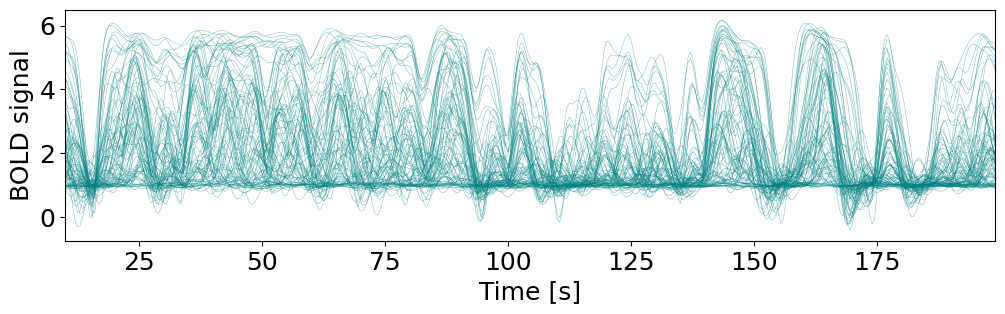

In [18]:
import scipy.stats as stats
t = np.arange(bold.shape[1]) * 0.5
bold_m = bold - bold.mean(axis=1, keepdims=True)
bold_z = stats.zscore(bold[:, 20:], axis=1) 
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(t[20:], bold[:, 20:].T, color='teal', alpha=0.6, lw=0.3)
# ax.plot(t[20:], bold_m[:, 20:].T, color='teal', alpha=0.3, lw=0.5)
ax.set_xlabel('Time [s]')
ax.set_ylabel('BOLD signal')
ax.margins(x=0);